Import public packages and functions

In [1]:
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from itertools import compress
import re

import openpyxl
from datetime import datetime
from scipy.spatial import distance
from scipy.ndimage import uniform_filter1d
import math
from scipy.signal import find_peaks, peak_prominences
import statistics as stat
import json

In [2]:
def get_repo_path_in_notebook():
    """
    Finds path of repo from Notebook.
    Start running this once to correctly find
    other modules/functions
    """
    path = os.getcwd()
    repo_name = 'ultraleap_analysis'

    while path[-len(repo_name):] != 'ultraleap_analysis':

        path = os.path.dirname(path)

    return path

In [3]:
repo_path = get_repo_path_in_notebook()
code_path = os.path.join(repo_path, 'code')
os.chdir(code_path)

Import own functions

In [4]:
import import_data.import_and_convert_data as import_dat
import import_data.find_paths as find_paths
import import_data.preprocessing_meta_info as meta_info
import sig_processing.segment_tasks as tasks
import movement_calc.helpfunctions as hp
import sig_processing.calc_features as feat_ext

### Loading files

Reloading own functions

In [5]:
importlib.reload(import_dat)
importlib.reload(tasks)
importlib.reload(find_paths)
importlib.reload(feat_ext)

<module 'sig_processing.calc_features' from 'c:\\Users\\madal\\Thesis\\ultraleap_analysis\\code\\sig_processing\\calc_features.py'>

In [102]:
folder = 'patientdata'
sub = 'ul020'
cond = 'm1s1'
cam = 'dt'
task = 'all'
side = 'lh'
one_drive_path = find_paths.find_onedrive_path(folder)
one_drive_path

'c:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\patientdata'

In [103]:
raw_file = import_dat.import_string_data(
    os.path.join(
    one_drive_path, sub, cam, 
    f'{sub}_{cond}_{cam}_{task}', 
    f'{sub}_{cond}_{cam}_{task}_{side}.csv'), 
    False)
raw_file

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,12:02:51:2439,1.7855,56.8388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12:02:51:2928,1.8345,5.5066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12:02:51:2940,1.8357,2.8365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12:02:51:2966,1.8382,2.6532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12:02:51:2996,1.8412,2.2527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99510,12:08:37:7754,348.3170,2.5305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99511,12:08:37:7785,348.3201,3.6901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99512,12:08:37:7815,348.3231,2.5799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99513,12:08:37:7839,348.3255,2.8470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


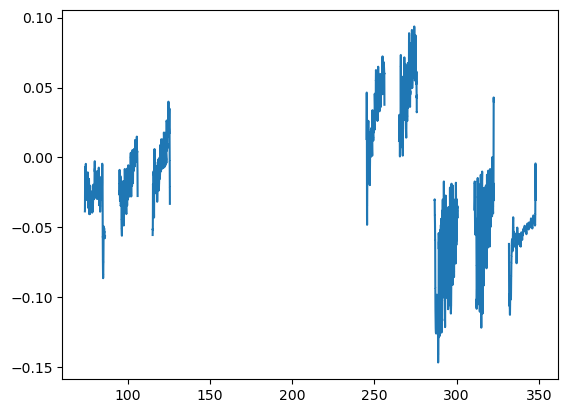

In [104]:
plt.plot(raw_file['program_time'], raw_file['index_tip_x'])

####################

In [508]:
folder = 'patientdata'
sub = 'ul003'
cond = 'm1s0'
cam = 'dt'
task1 = 'ps_1'
side = 'rh'
one_drive_path = find_paths.find_onedrive_path(folder)
one_drive_path

'c:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\patientdata'

In [509]:
raw_file_1 = import_dat.import_string_data(
    os.path.join(
    one_drive_path, sub, cam, 
    f'{sub}_{cond}_{cam}_{task1}', 
    f'{sub}_{cond}_{cam}_{task1}_{side}.csv'), 
    False)
raw_file_1

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:32:52:2991,13.6202,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09:32:52:3031,13.6241,0.0039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09:32:52:3041,13.6251,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09:32:52:3041,13.6251,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09:32:52:3051,13.6261,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20328,09:33:12:5336,33.8547,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20329,09:33:12:5346,33.8556,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20330,09:33:12:5353,33.8563,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20331,09:33:12:5363,33.8574,0.0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [510]:
folder = 'patientdata'
sub = 'ul003'
cond = 'm1s0'
cam = 'dt'
task2 = 'ps_2'
side = 'rh'
one_drive_path = find_paths.find_onedrive_path(folder)
one_drive_path

'c:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\patientdata'

In [511]:
raw_file_2 = import_dat.import_string_data(
    os.path.join(
    one_drive_path, sub, cam, 
    f'{sub}_{cond}_{cam}_{task2}', 
    f'{sub}_{cond}_{cam}_{task2}_{side}.csv'), 
    False)
raw_file_2

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:33:34:6221,14.3258,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09:33:34:6258,14.3295,0.0038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09:33:34:6269,14.3305,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09:33:34:6279,14.3315,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09:33:34:6279,14.3315,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13713,09:33:47:4856,27.1892,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,09:33:47:4861,27.1897,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,09:33:47:4871,27.1907,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13716,09:33:47:4880,27.1916,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [512]:
raw_files = [raw_file_1,raw_file_2]

In [514]:
raw_concat = pd.concat(raw_files)
display(raw_concat)

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:32:52:2991,13.6202,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09:32:52:3031,13.6241,0.0039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09:32:52:3041,13.6251,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09:32:52:3041,13.6251,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09:32:52:3051,13.6261,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13713,09:33:47:4856,27.1892,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,09:33:47:4861,27.1897,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,09:33:47:4871,27.1907,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13716,09:33:47:4880,27.1916,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


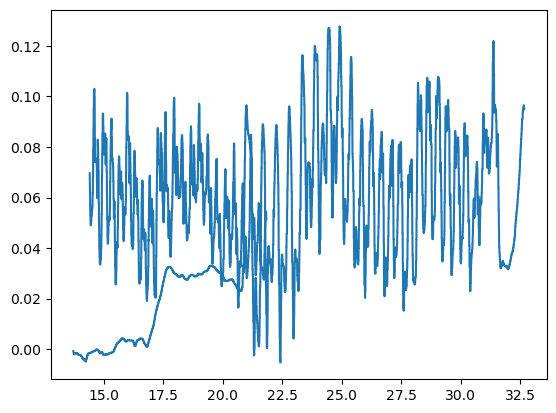

In [516]:
plt.plot(raw_concat['program_time'], raw_concat['index_tip_x'])

####################

In [105]:
side

'lh'

In [107]:
split_data = raw_file[
            np.logical_and(
                raw_file['global_time'] >= '12:08:21',
                raw_file['global_time'] <= '12:08:36'
                )
                ].reset_index(drop=True)
split_data

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,12:08:21:0005,331.5421,2.8832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12:08:21:0046,331.5462,2.1483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12:08:21:0054,331.5471,2.5110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12:08:21:0080,331.5496,3.0231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12:08:21:0116,331.5532,5.2135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,12:08:35:9634,346.5050,5.5595,-0.0316,0.2653,-0.0446,-0.0179,0.2202,-0.0454,-0.0200,...,0.1644,-0.0339,-0.0266,0.1716,-0.0362,0.0,0.0,56.4726,0.0,1.0
1896,12:08:35:9787,346.5203,5.0600,-0.0316,0.2653,-0.0446,-0.0179,0.2202,-0.0454,-0.0200,...,0.1644,-0.0339,-0.0266,0.1716,-0.0362,0.0,0.0,56.4724,0.0,1.0
1897,12:08:35:9844,346.5260,3.2520,-0.0314,0.2654,-0.0444,-0.0177,0.2204,-0.0451,-0.0198,...,0.1645,-0.0337,-0.0264,0.1717,-0.0360,0.0,0.0,56.2818,0.0,1.0
1898,12:08:35:9933,346.5349,3.5223,-0.0314,0.2654,-0.0444,-0.0177,0.2204,-0.0451,-0.0198,...,0.1645,-0.0337,-0.0264,0.1717,-0.0360,0.0,0.0,56.2817,0.0,1.0


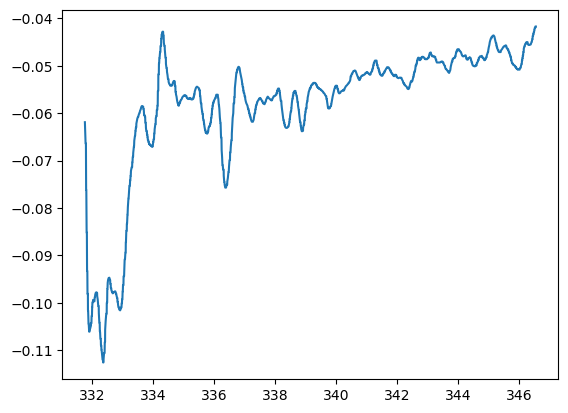

In [108]:
plt.plot(split_data['program_time'], split_data['index_tip_x'])

In [109]:
new_task = 'pt'
new_folder = f'{sub}_{cond}_{cam}_{new_task}'
new_folder

'ul020_m1s1_dt_pt'

In [110]:
path = f'C:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\{folder}\\{sub}\\{cam}\\{new_folder}'
if not os.path.exists(path):
    os.makedirs(path)
split_data.to_csv(os.path.join(path, f'{sub}_{cond}_{cam}_{new_task}_{side[0]}'+'h.csv'))

Cleaned Data

In [ ]:
clean_file = import_dat.import_string_data(os.path.join(one_drive_path, sub, cam, f'{sub}_{cond}_{cam}_{task}', f'{sub}_{cond}_{cam}_{task}_{side}.csv'), True)

In [ ]:
plt.plot(clean_file['program_time'], clean_file['index_tip_x'])

Calculate Sampling Rates

In [28]:
data = import_dat.import_string_data('C:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\patientdata\\ul004\\dt\\ul004_m1s0_dt_ft\\ul004_m1s0_desktop_ft_lh.csv', False)
data

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,11:32:32:5191,16.8808,0.0460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11:32:32:5692,16.9309,0.0058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11:32:32:5702,16.9319,0.0012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11:32:32:5711,16.9328,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11:32:32:5719,16.9336,0.0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78736,11:33:42:3200,86.6817,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78737,11:33:42:3206,86.6823,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78738,11:33:42:3216,86.6833,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78739,11:33:42:3217,86.6834,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
